Importing tools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure

Reading in the dataset

In [ ]:
data = pd.read_csv('data\KCC_Libraries.csv')

Taking a quick look at the dataset

In [ ]:
data.head(5)

In [ ]:
data.groupby(['district']).sum().sort_values('items_in_stock', ascending=False)


Is the biggest library also the busiest?

In [ ]:
big_libraries = data.sort_values('total_borrowers', ascending=False)[['location','total_borrowers','number_of_visits']].head(20)
big_libraries

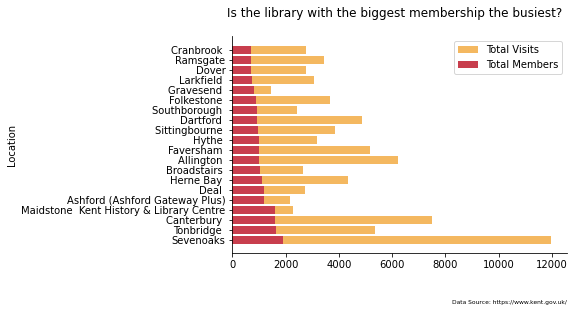

In [256]:
plt.figure(dpi=100)
plt.barh(big_libraries['location'], big_libraries['number_of_visits'], color='#F4B860', label='Total Visits')
plt.barh(big_libraries['location'], big_libraries['total_borrowers'], color='#C83E4D', label='Total Members')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.ylabel('Location')
plt.suptitle('Is the library with the biggest membership the busiest?')
plt.figtext(0.9, -0.05, 'Data Source: https://www.kent.gov.uk/', horizontalalignment='right', fontsize=6) 
plt.savefig('Biggest_Busiest.jpg')
plt.show()

In [ ]:
data.sort_values('computer_hours', ascending=False).head(10)[['district', 'location','computer_hours']]

Taking a look at the above, we can see that each age group has it's own column whichmight not be needed.  We can unpivot these columns so we have one column holding the age categories, and another column holding the count for each.

In [ ]:
data_unpivot = data.melt(
    id_vars=[
        "district",
        "location",
        "total_borrowers",
        "number_of_borrowed_items",
        "computer_hours",
        "number_of_visits",
        "items_in_stock",
        "staffing_costs",
        "premises_costs",
        "other_costs",
        "total_costs",
        "cost_per_borrow",
        "number_of_birth_and_death_registrations",
    ],
    var_name="age",
    value_name="number_of_borrowers",
)
data_unpivot

In [ ]:
total_items = data.groupby('district').sum().sort_values('items_in_stock', ascending=False).reset_index()[['district','items_in_stock','number_of_visits']]
total_items

In [ ]:
plt.figure(dpi=100)
plt.barh(total_items.district, total_items.items_in_stock, color='#F4B860', label='Total Library Items')
plt.barh(total_items.district, total_items.number_of_visits, color='#C83E4D', label='Total Visits')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.ylabel('Number of Items Available')
plt.suptitle('Number of items vs. Number of borrows')
plt.title('per District')
plt.figtext(0.9, -0.1, 'Data Source: https://www.kent.gov.uk/', horizontalalignment='right', fontsize=6) 
plt.xticks(rotation = 60)
plt.show()

In [ ]:
computers = data.sort_values('computer_hours', ascending=False).head(10)[['location','computer_hours']]
computers

In [ ]:
plt.figure(dpi=100)
plt.barh(computers['location'], computers['computer_hours'], color='#C83E4D')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.ylabel('Location')
plt.xlabel('Total Hours')
plt.suptitle('Number Of Computer Hours Logged Per Disctrict')
plt.figtext(0.9, -0.05, 'Data Source: https://www.kent.gov.uk/', horizontalalignment='right', fontsize=6) 
plt.show()

In [ ]:
ages_by_district = data.groupby('district').sum().reset_index().sort_values('60+', ascending=True)[['district','0-11','12-19','20-59','60+','other','total_borrowers']]
ages_by_district

In [ ]:
plt.figure(dpi=100)
plt.barh(ages_by_district['district'], ages_by_district['0-11'], color='#6699CC', label='0-9')
plt.barh(ages_by_district['district'], ages_by_district['12-19'], color='#4A5859', label='12-19')
plt.barh(ages_by_district['district'], ages_by_district['20-59'], color='#A0EEC0', label='20-59')
plt.barh(ages_by_district['district'], ages_by_district['60+'], color='#F4B860', label='60+')
plt.barh(ages_by_district['district'], ages_by_district['other'], color='#C83E4D', label='other')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.ylabel('Number Of Borrowers')
plt.suptitle('Number Of Borrowers Per District')
plt.figtext(0.9, -0.05, 'Data Source: https://www.kent.gov.uk/', horizontalalignment='right', fontsize=6) 
plt.